执行命令行创建 不同 timescale 的 cpd 

In [5]:
import os
# coins=['btc','eth']
# coins=['btc']
lbw=[7,14,21,30,60]
# lbw=[30,60]
for coin in coins:
    for l in lbw:
        try:
            os.system(f'python cpd_quandl.py  -t {coin} -f /home/tao/transformer/resive_trading-momentum-transformer/data/quandl/{coin}_cpd_{l}.csv -s 2017-08-17 -t 2023-01-24 -l {l}')
        except Exception as e:
            print(e)

遍历文件，循环读取 cpd 文件

In [3]:
def plot_cpd_price(cpd_data,price_data,coin,looking_back_window):
    import matplotlib.pyplot as plt
    import pandas as pd
    price_data.set_index('open_time',inplace=True)
    price_data['series']=list(range(0,len(price_data),1))
    # price['2017-09-16':'2023-01-23']
    data1=cpd_data.merge(price_data,how='right',left_index=True, right_index=True)
    data1['t']=list(range(0,len(data1),1))
    cpd_loc=data1['2020-08-30':'2021-12-30']
    cpd_loc=cpd_loc[cpd_loc['cp_score']>=0.999]
    # change cpd_loc to int
    cpd_loc['cp_location_int']=cpd_loc['cp_location'].round(0)
    cpd_show=data1['2020-08-30':'2021-12-30'] #price data
    # time_labels=pd.date_range('2020-08-30','2021-12-30')
    fig=plt.figure(figsize=(18,8))
    plt.title(f'cpd location in {coin} from 2020-08-30 to 2021-12-30 with looking backwindow={looking_back_window}',fontsize=20)
    # print(cpd_show['close'])
    plt.plot(cpd_show.t,cpd_show['close'],color='blue')
    for i in cpd_loc['cp_location']:
        plt.axvline(i,color='black',alpha=0.1)
        
    plt.scatter(cpd_loc.cp_location,cpd_loc['close'],color='red')
    plt.savefig(f'/home/tao/transformer/resive_trading-momentum-transformer/examples/cpd_plots/{coin}_{looking_back_window}_2020-08-30_2021-08-30.png')
      
    

/home/tao/transformer/resive_trading-momentum-transformer/data/quandl/eth_cpd_120.csv
/home/tao/transformer/resive_trading-momentum-transformer/data/quandl/btc_cpd_60.csv
/home/tao/transformer/resive_trading-momentum-transformer/data/quandl/btc_cpd_7.csv
/home/tao/transformer/resive_trading-momentum-transformer/data/quandl/eth_cpd_60.csv
/home/tao/transformer/resive_trading-momentum-transformer/data/quandl/eth_cpd_14.csv
/home/tao/transformer/resive_trading-momentum-transformer/data/quandl/btc_cpd_30.csv
/home/tao/transformer/resive_trading-momentum-transformer/data/quandl/eth_cpd_7.csv
/home/tao/transformer/resive_trading-momentum-transformer/data/quandl/eth_cpd_90.csv
/home/tao/transformer/resive_trading-momentum-transformer/data/quandl/btc_cpd_14.csv
/home/tao/transformer/resive_trading-momentum-transformer/data/quandl/btc_cpd_180.csv
/home/tao/transformer/resive_trading-momentum-transformer/data/quandl/btc_cpd_90.csv
/home/tao/transformer/resive_trading-momentum-transformer/data/qu

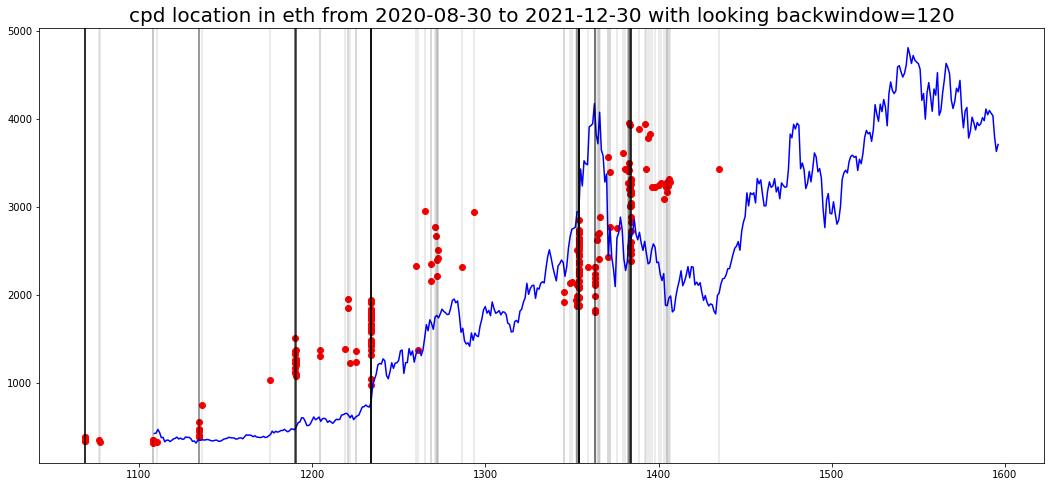

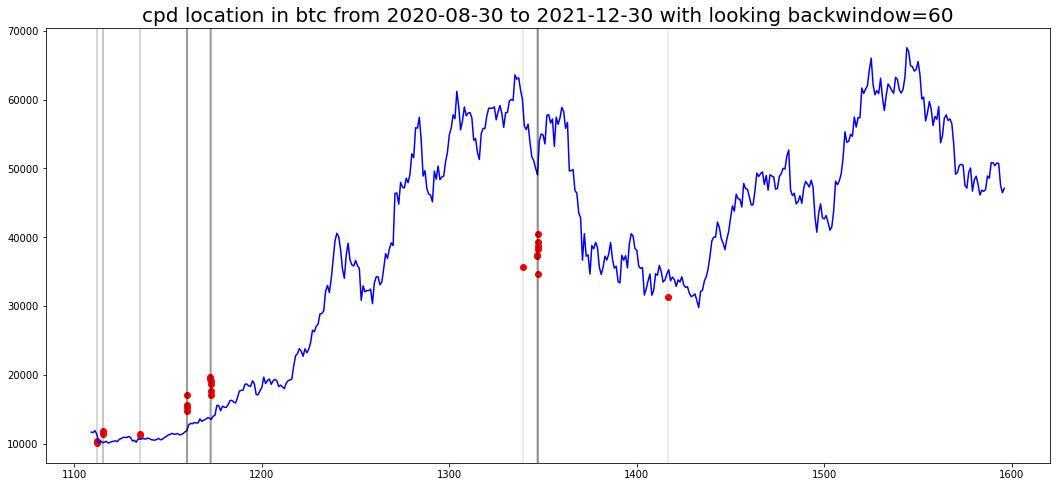

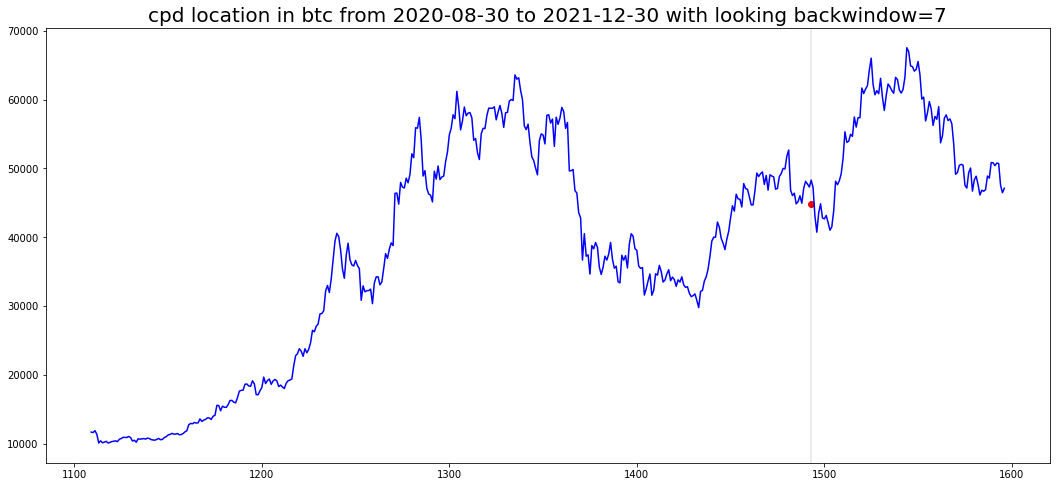

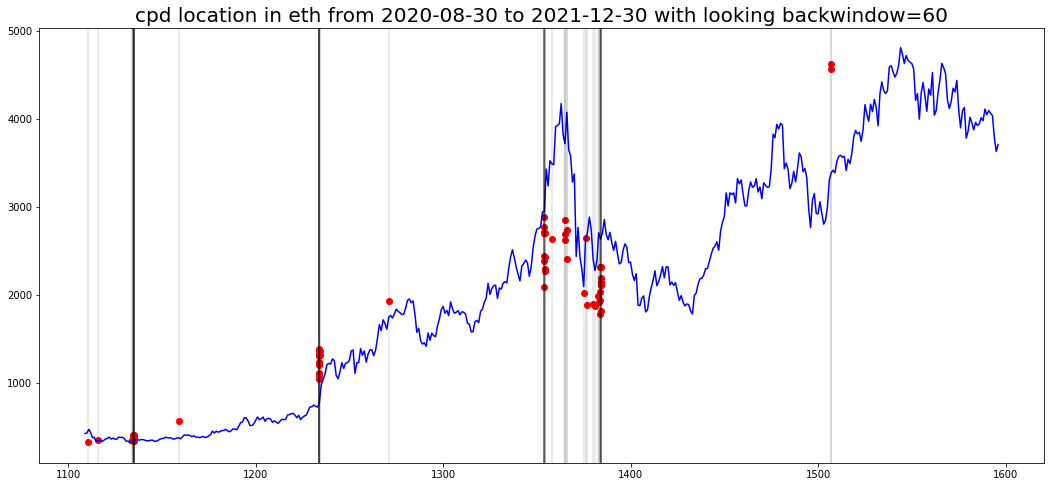

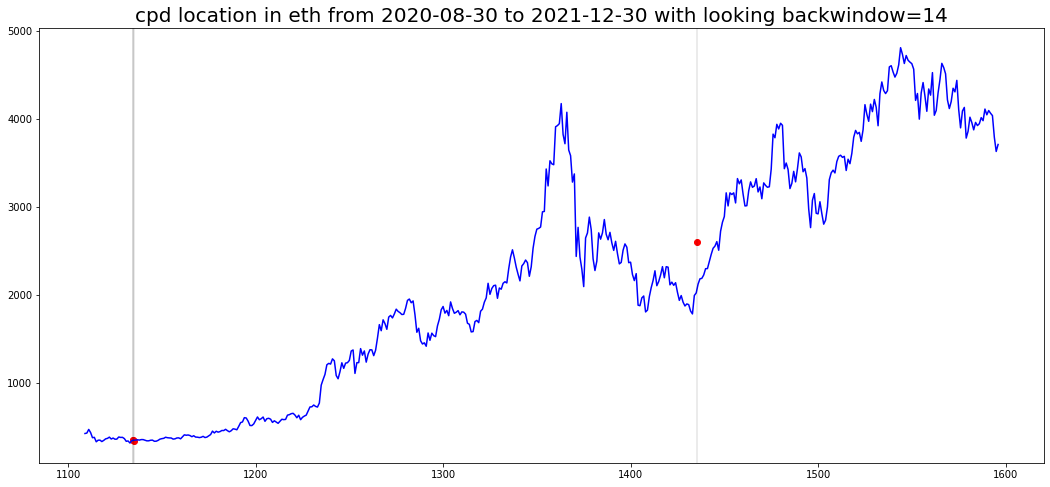

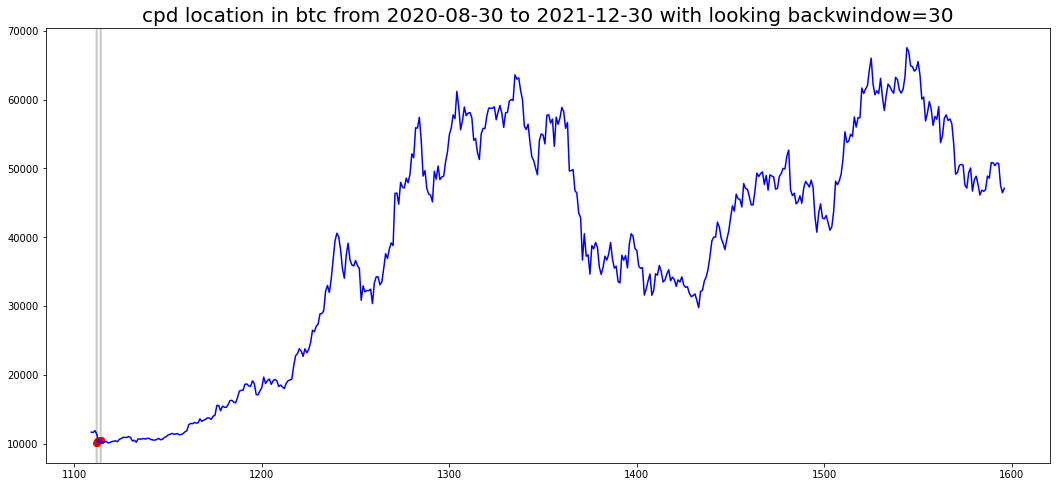

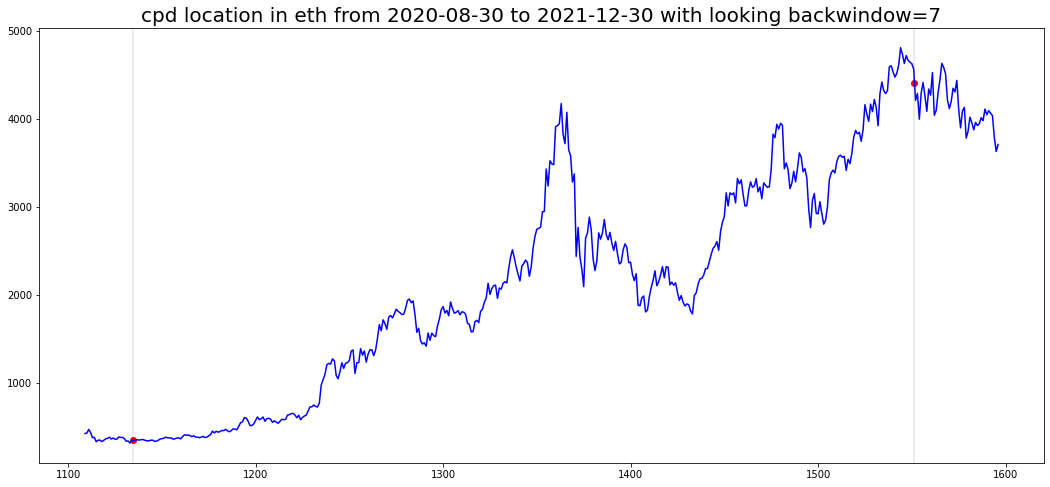

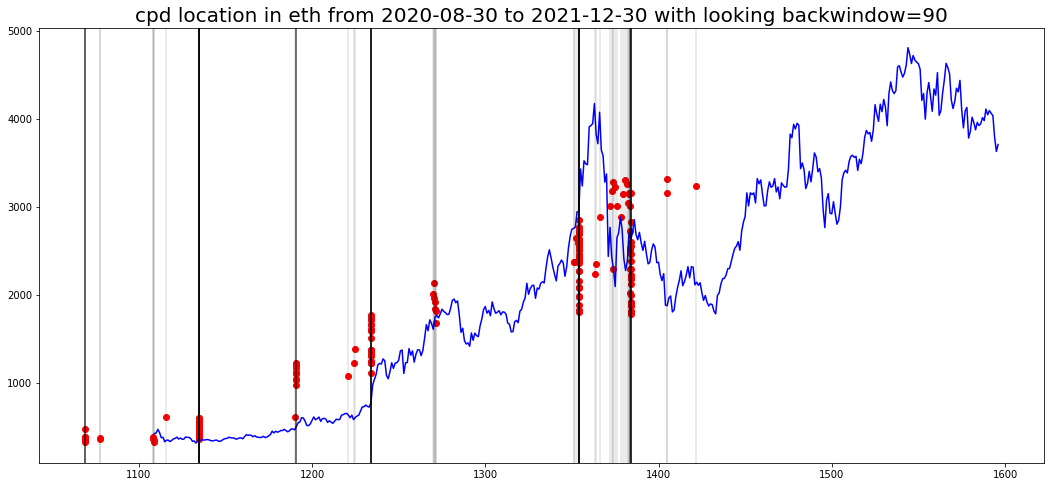

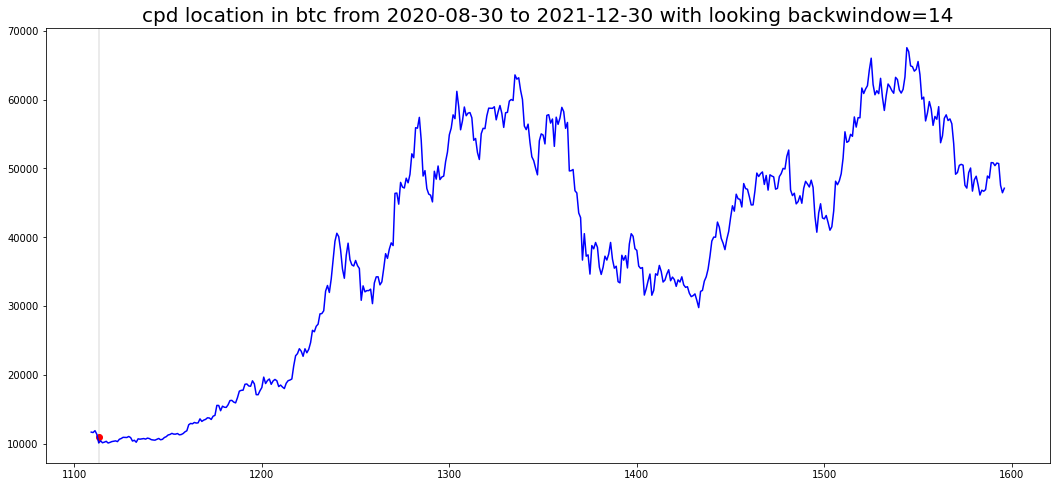

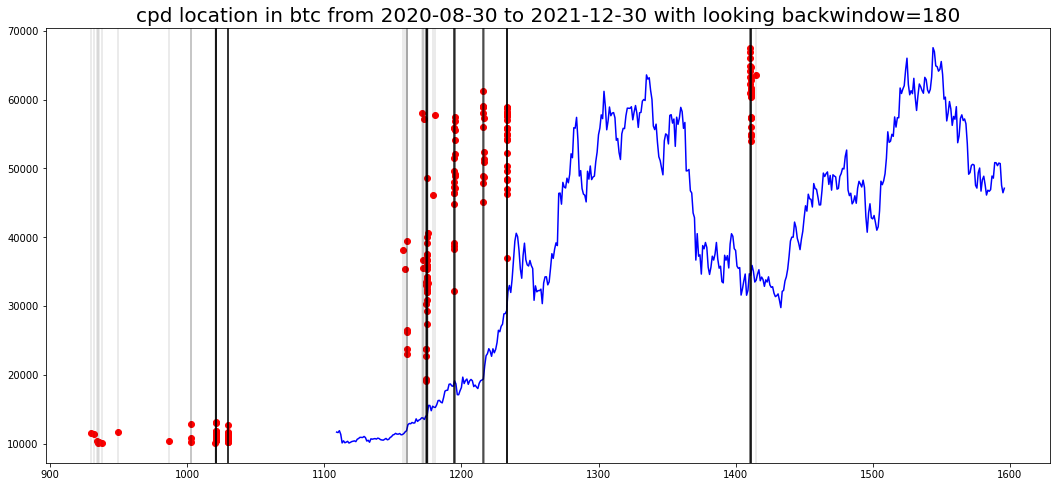

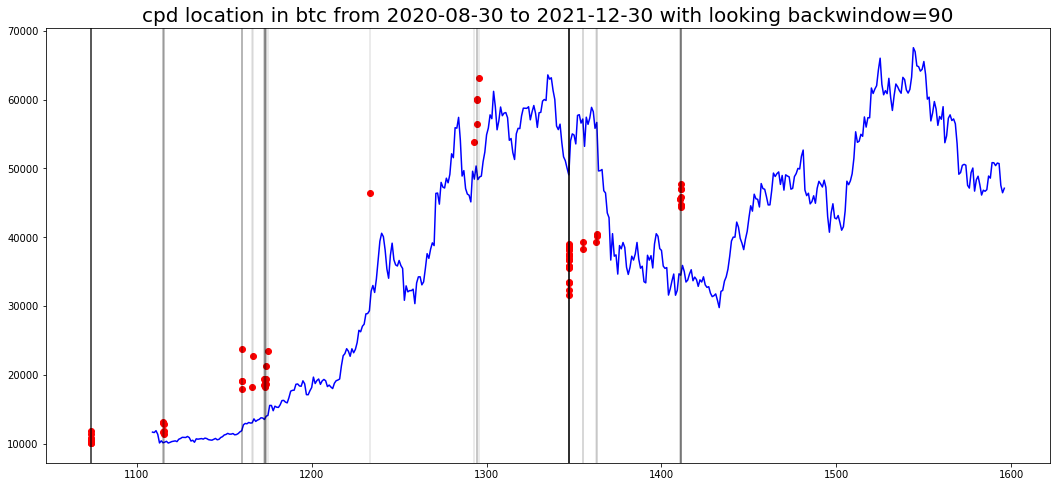

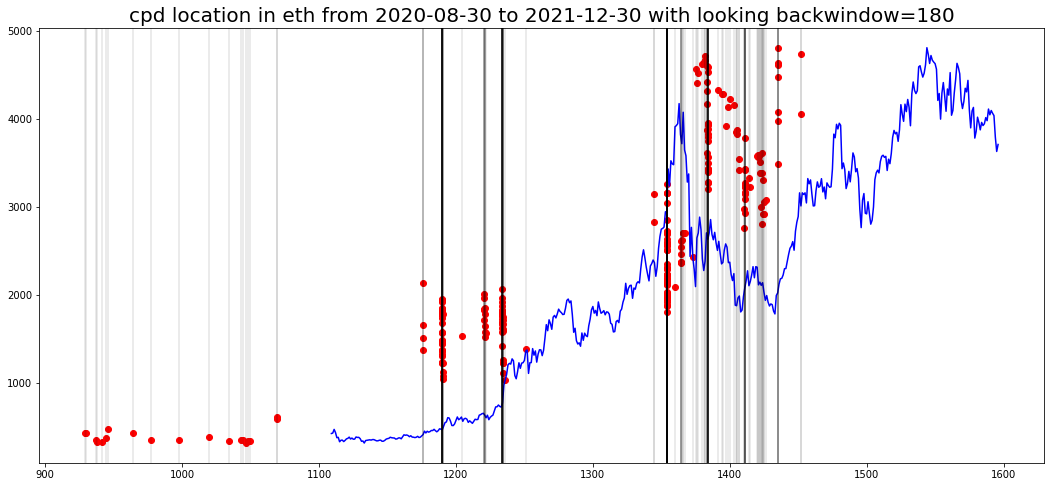

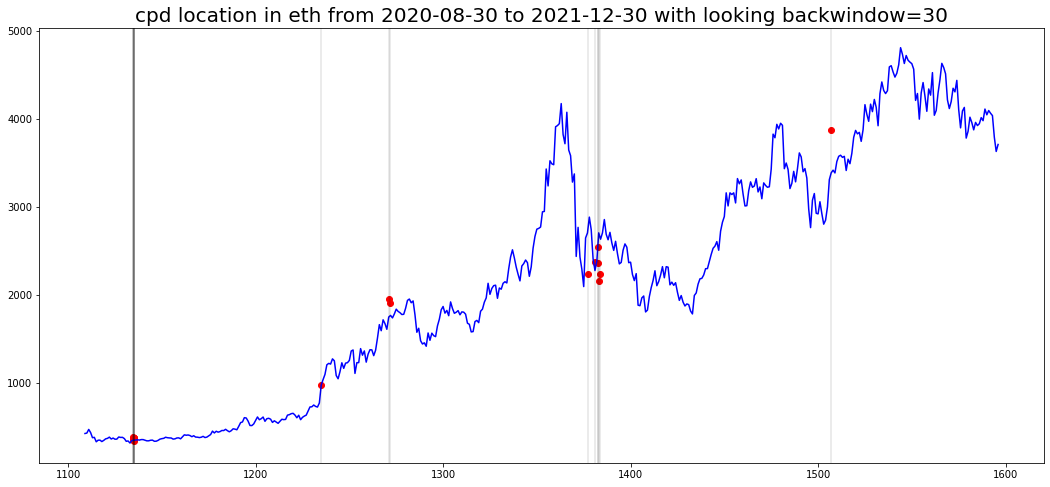

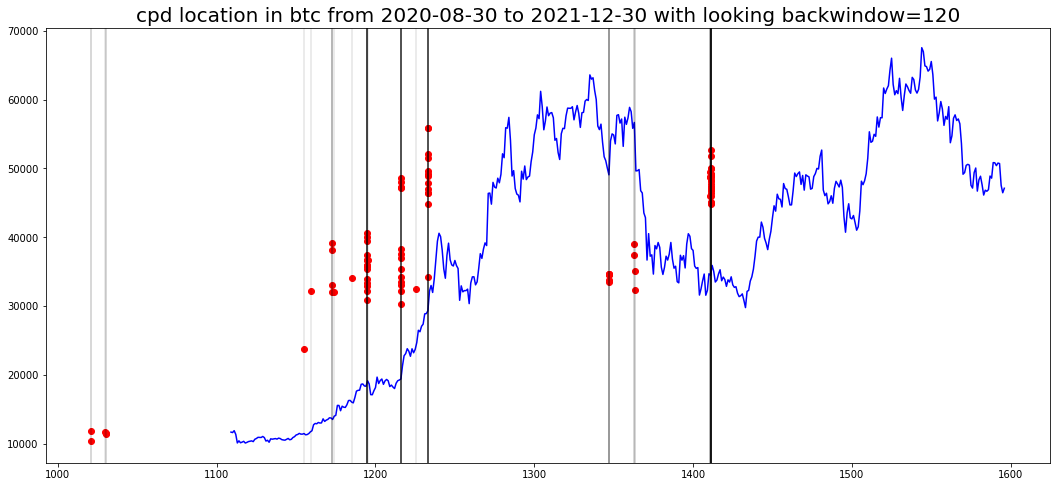

In [4]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

for file in glob.glob('/home/tao/transformer/resive_trading-momentum-transformer/data/quandl/*_cpd_*'):
   print(file) 
   cpd=pd.read_csv(f'{file}')
   cpd.sort_values('date',ascending=True)
   cpd.set_index('date',inplace=True)
   looking_back_window=file.split('_')[-1][:-4]
   # print(looking_back_window)
   coin_symbol=file.split('/')[-1]
   if coin_symbol.startswith('eth'):
      price=pd.read_csv('/home/tao/transformer/resive_trading-momentum-transformer/data/quandl/eth.csv')
      plot_cpd_price(cpd,price,'eth',looking_back_window)
   elif coin_symbol.startswith('btc'):
      price1=pd.read_csv('/home/tao/transformer/resive_trading-momentum-transformer/data/quandl/btc.csv')   
      plot_cpd_price(cpd,price1,'btc',looking_back_window)
   
   



In [11]:
file

'/home/tao/transformer/resive_trading-momentum-transformer/data/quandl/eth_cpd_30.csv'

In [5]:
pd.read_csv('/home/tao/transformer/resive_trading-momentum-transformer/data/quandl_cpd_150lbw.csv')

,Date,date,ticker,close,srs,daily_returns,daily_vol,target_returns,norm_daily_return,norm_monthly_return,...,macd_32_96,day_of_week,day_of_month,week_of_year,month_of_year,year,cp_rl_150,cp_score_150,cp_rl_10,cp_score_10
0,2018-04-27,2018-04-27,btc,8915.35,8915.35,-0.037843,0.051228,0.008951,-0.738711,1.493152,...,-1.274701,4,27,17,4,2018,0.444385,0.999420,3.681536e-01,0.824106
1,2018-04-28,2018-04-28,btc,9348.00,9348.00,0.048529,0.051042,0.001406,0.950768,1.520331,...,-1.227835,5,28,17,4,2018,0.418930,0.999575,8.647221e-01,0.808664
2,2018-04-29,2018-04-29,btc,9419.00,9419.00,0.007595,0.050201,-0.003457,0.151297,1.487163,...,-1.178328,6,29,17,4,2018,0.451899,0.999698,5.985838e-01,0.757186
3,2018-04-30,2018-04-30,btc,9246.01,9246.01,-0.018366,0.049542,-0.003600,-0.370717,1.599660,...,-1.150853,0,30,18,4,2018,0.436027,0.999822,3.805667e-11,0.617105
4,2018-05-01,2018-05-01,btc,9071.48,9071.48,-0.018876,0.048893,0.003757,-0.386073,1.452694,...,-1.138689,1,1,18,5,2018,0.464436,0.999835,2.241526e-01,0.820976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,2019-02-07,2019-02-07,eth,104.48,104.48,-0.000191,0.049756,0.026847,-0.003847,-0.615612,...,-2.232884,3,7,6,2,2019,0.433288,0.802255,3.969000e-01,0.892070
2020,2019-02-08,2019-02-08,eth,119.25,119.25,0.141367,0.055429,-0.000086,2.550416,0.002643,...,-2.243690,4,8,6,2,2019,0.544613,0.986712,7.953091e-03,0.993880
2021,2019-02-09,2019-02-09,eth,119.19,119.19,-0.000503,0.054513,0.008624,-0.009230,-0.111340,...,-2.263616,5,9,6,2,2019,0.551750,0.986420,1.643307e-01,0.978102
2022,2019-02-10,2019-02-10,eth,125.12,125.12,0.049752,0.054320,-0.005881,0.915913,0.261616,...,-2.272145,6,10,6,2,2019,0.591216,0.982554,3.984939e-01,0.917322


In [8]:
data=pd.read_csv('/home/tao/transformer/resive_trading-momentum-transformer/examples/test_with_buffer_4.csv')

In [11]:
data.set_index('Date',inplace=True)
data.head()

,date,ticker,close,srs,daily_returns,daily_vol,target_returns,norm_daily_return,norm_monthly_return,norm_quarterly_return,...,day_of_week,day_of_month,week_of_year,month_of_year,year,cp_rl_150,cp_score_150,cp_rl_10,cp_score_10,static_ticker
Date,,,,,,,,,,,,,,,,,,,,,
2020-04-25,2020-04-25,btc,7538.67,7538.67,0.004486,0.054330,0.003563,0.082576,0.399299,-0.507524,...,5,25,17,4,2020,0.325709,1.0,0.113805,0.946270,0
2020-04-26,2020-04-26,btc,7693.10,7693.10,0.020485,0.053521,0.001871,0.382751,0.554041,-0.531456,...,6,26,17,4,2020,0.332394,1.0,0.235238,0.921923,0
2020-04-27,2020-04-27,btc,7774.62,7774.62,0.010597,0.052650,-0.000823,0.201265,0.251469,-0.466271,...,0,27,18,4,2020,0.339059,1.0,0.142503,0.953090,0
2020-04-28,2020-04-28,btc,7738.98,7738.98,-0.004584,0.051803,0.024503,-0.088492,0.317024,-0.411668,...,1,28,18,4,2020,0.345730,1.0,0.493985,0.975001,0
2020-04-29,2020-04-29,btc,8778.57,8778.57,0.134332,0.056078,-0.003044,2.395449,0.749211,-0.001708,...,2,29,18,4,2020,0.352540,1.0,0.081382,0.996366,0


In [12]:
data["date"] = data.index.strftime("%Y-%m-%d")
data

AttributeError: 'Index' object has no attribute 'strftime'